In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Ruta al archivo CSV en la misma carpeta que el notebook
csv_path = '/content/drive/MyDrive/ICD/TP_FINAL/icd-base-tp-economistas.csv'
df = pd.read_csv(csv_path)

# Mostrar las primeras filas
df.head()


<ipython-input-2-914891071>:5: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,NaN,man,5.0,7.0,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [3]:
# Ver dimensiones
print("Dimensiones:", df.shape)

# Ver tipos de datos
print("\nTipos de variables:")
print(df.dtypes)

# Ver valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())


Dimensiones: (3552912, 16)

Tipos de variables:
maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year               float64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

Valores faltantes:
maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               3016807
transmission            741630
door_count             1090066
seat_count             1287099
fuel_type              1847606
date_created       

# Convertimos en fechas dado a que estan en objetos

In [4]:
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
df['date_last_seen'] = pd.to_datetime(df['date_last_seen'], errors='coerce')

# VALORES FALTANTES

In [5]:
# Ejemplo: eliminar columnas con más del 50% de datos faltantes
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.4].index
df.drop(columns=cols_to_drop, inplace=True)

# Para el resto: imputar o eliminar filas
#df = df.dropna(subset=['mileage', 'manufacture_year', 'engine_power', 'price_eur'])

# Rellenar algunos con valores comunes si es razonable
#df['fuel_type'].fillna('unknown', inplace=True)
#df['transmission'].fillna('unknown', inplace=True)


In [6]:
# Ver tipos de datos
print("\nTipos de variables:")
print(df.dtypes)

# Ver valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())


Tipos de variables:
maker                               object
model                               object
mileage                            float64
manufacture_year                   float64
engine_displacement                float64
engine_power                       float64
body_type                           object
transmission                        object
door_count                         float64
seat_count                         float64
date_created           datetime64[ns, UTC]
date_last_seen         datetime64[ns, UTC]
price_eur                          float64
dtype: object

Valores faltantes:
maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
transmission            741630
door_count             1090066
seat_count             1287099
date_created                 4
date_last_seen               6
price_eur     

# IMPUTACIÓN DE DATOS FALTATNTES

Con un umbral de 0.4

In [7]:
missing_ratio = df.isnull().mean()
cols_to_impute = missing_ratio[missing_ratio < 0.4].index

# NUMERICAS
for col in cols_to_impute:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)

# CATEGORICAS
for col in cols_to_impute:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-7-450070635>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-450070635>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [8]:
# Ver valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())


Valores faltantes:
maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
date_created           4
date_last_seen         6
price_eur              0
dtype: int64


In [9]:
df.dropna(subset=['date_created', 'date_last_seen'], inplace=True)


In [11]:
# Guardamos el archivo CSV
df.to_csv('/content/drive/MyDrive/ICD/TP_FINAL/df_clean.csv', index=False)


In [10]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5.0,7.0,2015-11-14 18:10:06.838319+00:00,2016-01-27 20:40:15.463610+00:00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5.0,5.0,2015-11-14 18:10:06.853411+00:00,2016-01-27 20:40:15.463610+00:00,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5.0,5.0,2015-11-14 18:10:06.861792+00:00,2016-01-27 20:40:15.463610+00:00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2015-11-14 18:10:06.872313+00:00,2016-01-27 20:40:15.463610+00:00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2015-11-14 18:10:06.880335+00:00,2016-01-27 20:40:15.463610+00:00,2738.71


In [26]:
# Verificamos valores únicos
print(df['seat_count'].unique())
# Reemplazamos strings vacíos o 'unknown' por NaN si fuera necesario
df_clean['seat_count'] = pd.to_numeric(df_clean['seat_count'], errors='coerce')


[  7.   5.   4.   6.   9.   8.   2.   3.   1.  18.  20.  10.  11.  15.
  12.  16.  14.  50.  17.  74.  65.  19.  54.  13.  27.  45.  24.  56.
  22. 255.  23.  57.  25.  51.  55.  61.  21.  53.  26.  58.  30.  36.
   0.  29.  52.  32.  44. 512.  33. 515.  59.  85. 517.  81.  43.  49.
 138.]


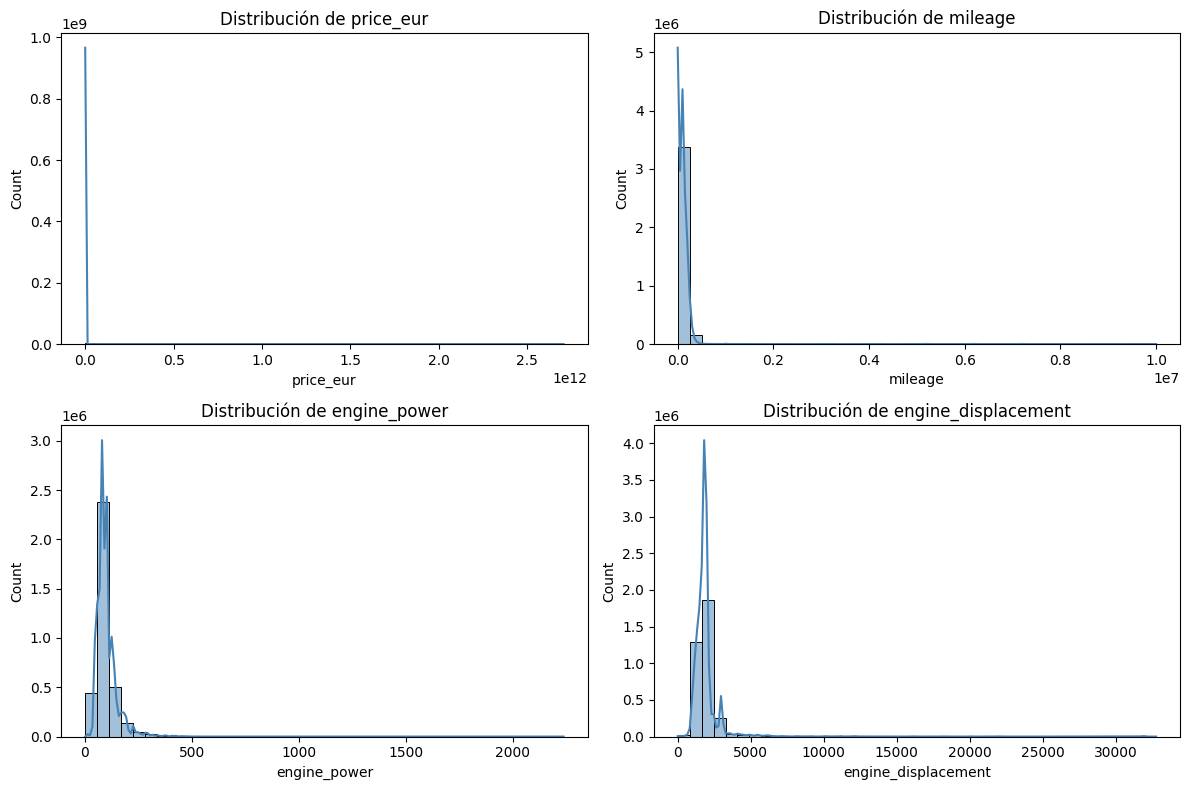

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['price_eur', 'mileage', 'engine_power', 'engine_displacement']

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde=True, bins=40, color='steelblue')
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()


# POSIBLES MEDIDAS DE ESTANDARIZACION

In [14]:
#kw a hp caballos de fuerza

df['engine_power_hp'] = df['engine_power'] * 1.34102


#Normalizacion de nombres eliminando espacios en blanco

df['maker'] = df['maker'].str.strip()
df['model'] = df['model'].str.strip()




# DETECCION DE VALORES ATIPICOS

In [27]:
# Verificamos valores únicos
print(df_clean['seat_count'].unique())
# Reemplazamos strings vacíos o 'unknown' por NaN si fuera necesario
df_clean['seat_count'] = pd.to_numeric(df_clean['seat_count'], errors='coerce')


[5.]


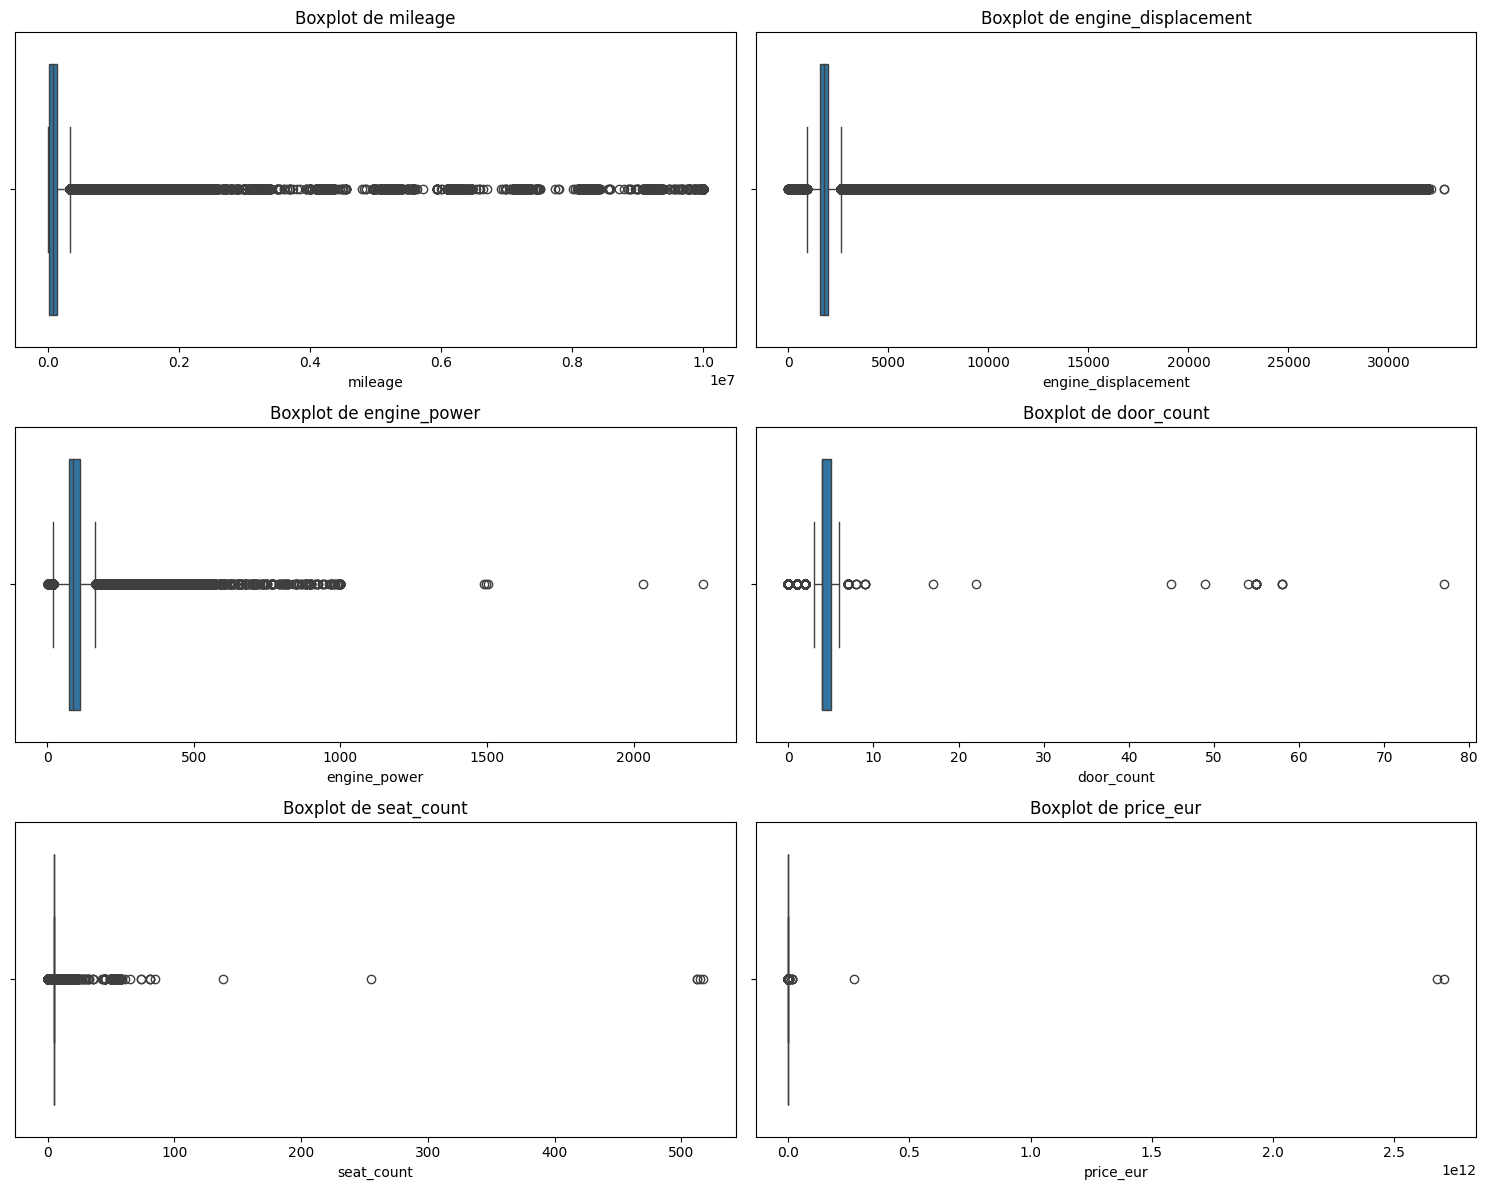

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas
numericas = ['mileage', 'engine_displacement', 'engine_power', 'door_count', 'seat_count', 'price_eur']

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [17]:
def eliminar_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = eliminar_outliers_iqr(df, numericas)


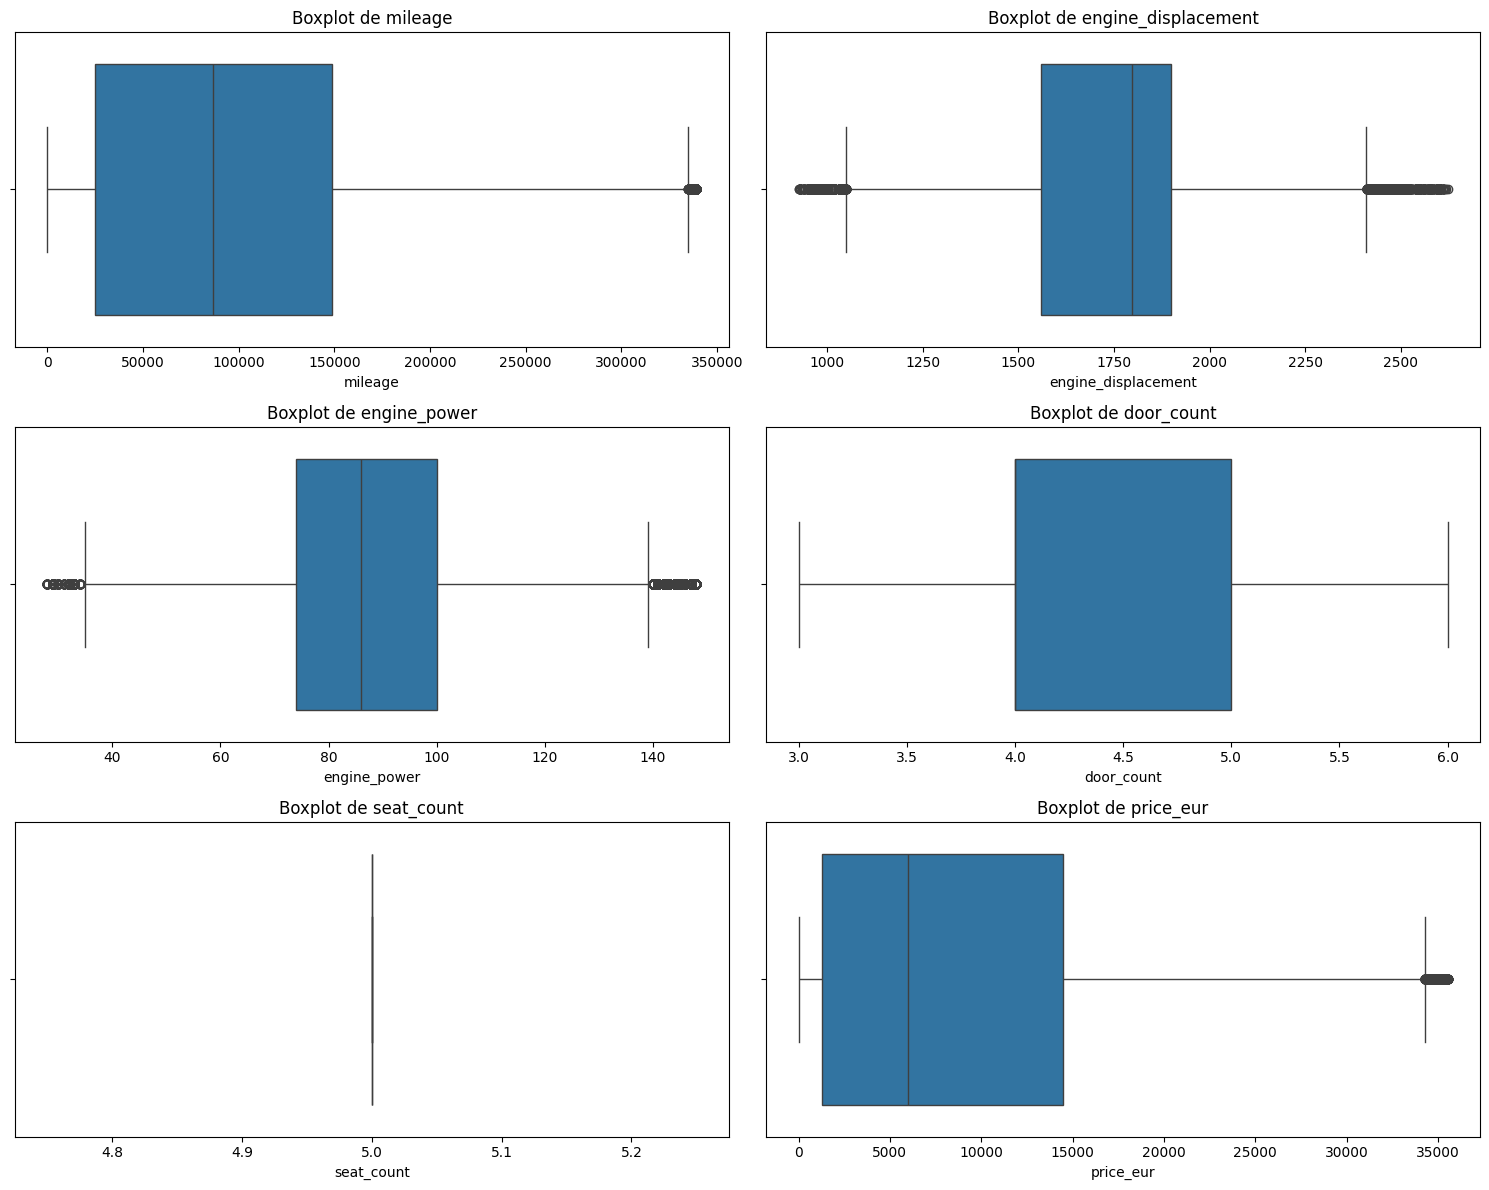

In [30]:
# Lista de columnas numéricas
numericas = ['mileage', 'engine_displacement', 'engine_power', 'door_count', 'seat_count', 'price_eur']

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# 3. Análisis exploratorio y visualización:


Distribucion de variables clave

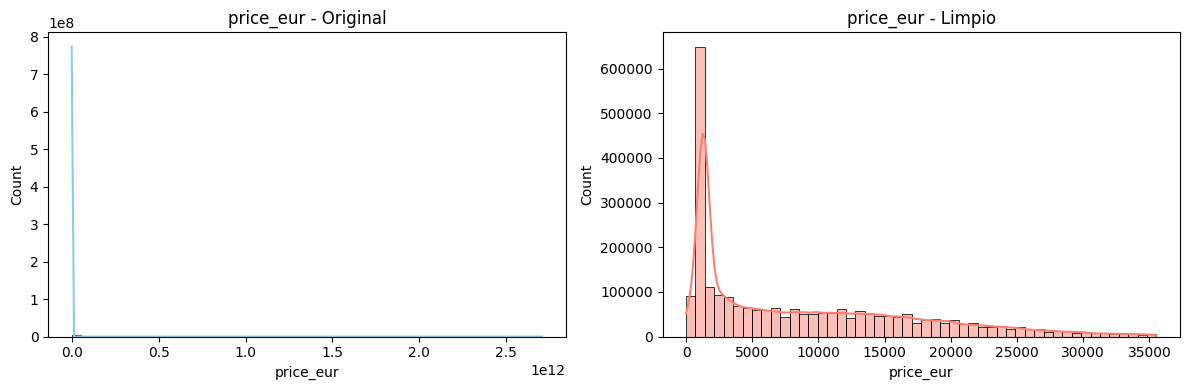

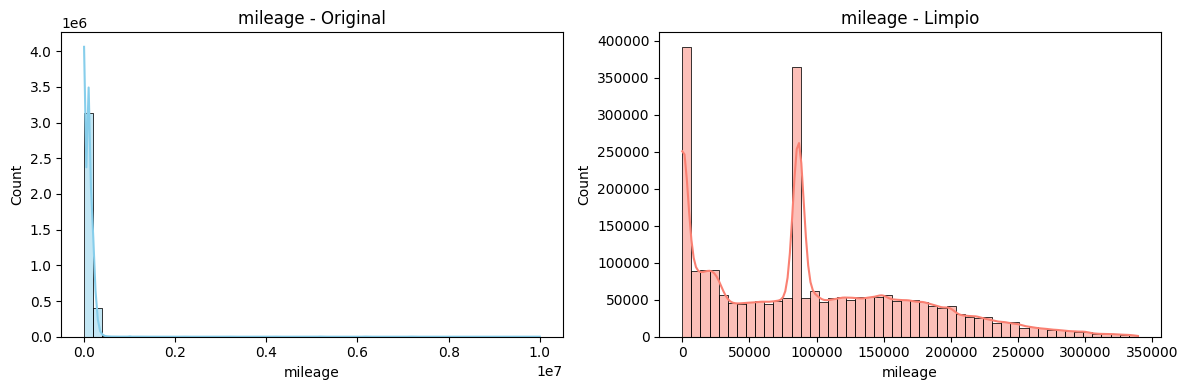

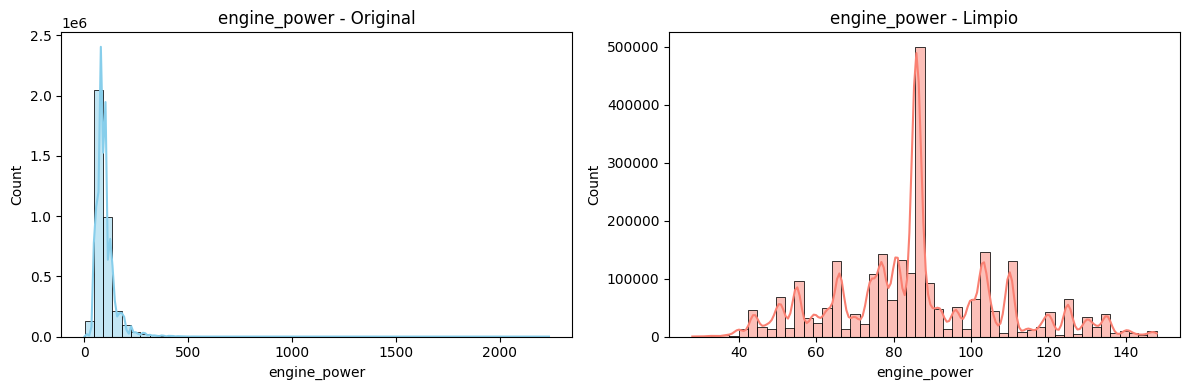

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['price_eur', 'mileage', 'engine_power']

for var in variables:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=50, kde=True, color='skyblue')
    plt.title(f'{var} - Original')

    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[var], bins=50, kde=True, color='salmon')
    plt.title(f'{var} - Limpio')

    plt.tight_layout()
    plt.show()


Relaciones entre variables

# BUSCO ESTANDARIZAR LOS VALORES NUMERICOS

In [20]:
from sklearn.preprocessing import StandardScaler

# 1. Seleccionamos solo las columnas numéricas
numeric_cols = df_clean.select_dtypes(include='number').columns

# 2. Creamos el scaler y lo aplicamos
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# Ahora df_scaled tiene los valores estandarizados
print(df_scaled[numeric_cols].head())


    mileage  manufacture_year  engine_displacement  engine_power  door_count  \
1  0.617653          0.137513             0.980507     -0.236511    1.506909   
2  0.021607          0.114148             0.963695     -0.051903    1.506909   
3  0.207631          0.044053            -1.709336     -1.805678    1.506909   
4  0.427777          0.044053            -1.709336     -1.805678    1.506909   
5  0.584545          0.032370            -1.709336     -2.128742    1.506909   

   seat_count  price_eur  engine_power_hp  
1         0.0  -0.002128        -0.236511  
2         0.0   0.377283        -0.051903  
3         0.0  -0.708027        -1.805678  
4         0.0  -0.734498        -1.805678  
5         0.0  -0.866855        -2.128742  


# VUELVO A GRAFICAR

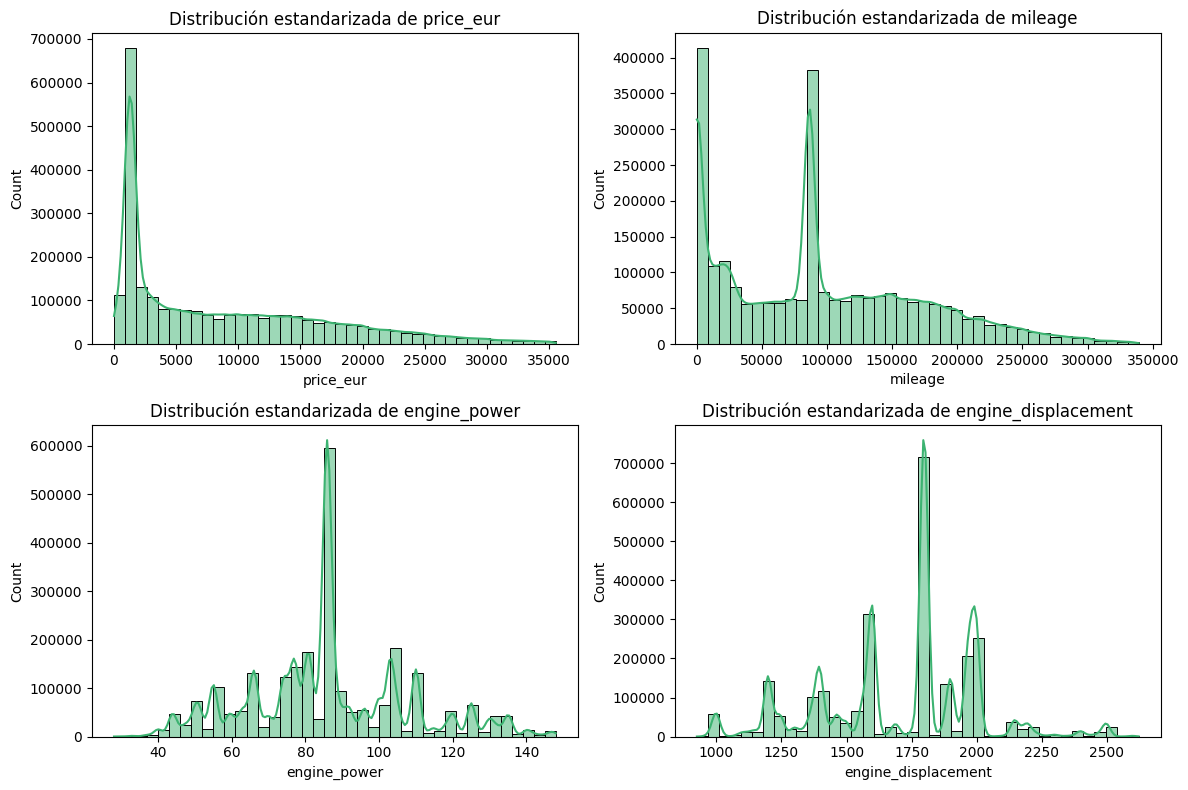

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['price_eur', 'mileage', 'engine_power', 'engine_displacement']

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_clean[var], kde=True, bins=40, color='mediumseagreen')
    plt.title(f'Distribución estandarizada de {var}')
plt.tight_layout()
plt.show()


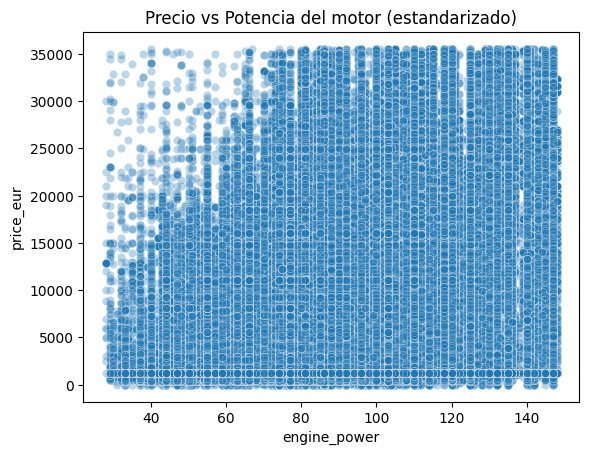

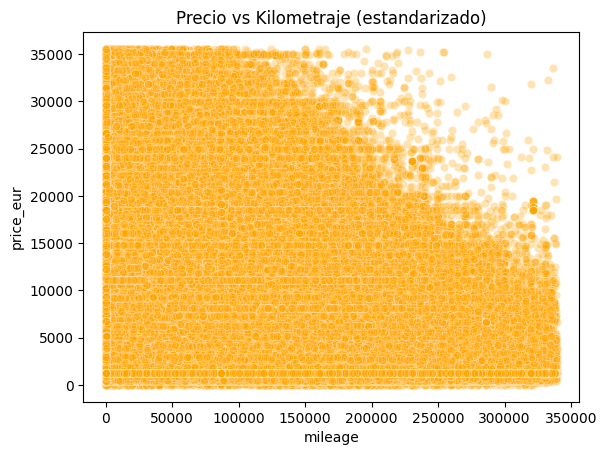

In [22]:
sns.scatterplot(data=df_clean, x='engine_power', y='price_eur', alpha=0.3)
plt.title('Precio vs Potencia del motor (estandarizado)')
plt.show()

sns.scatterplot(data=df_clean, x='mileage', y='price_eur', alpha=0.3, color='orange')
plt.title('Precio vs Kilometraje (estandarizado)')
plt.show()


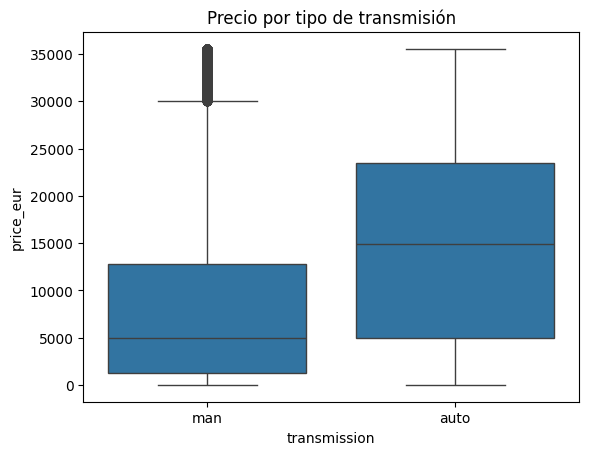

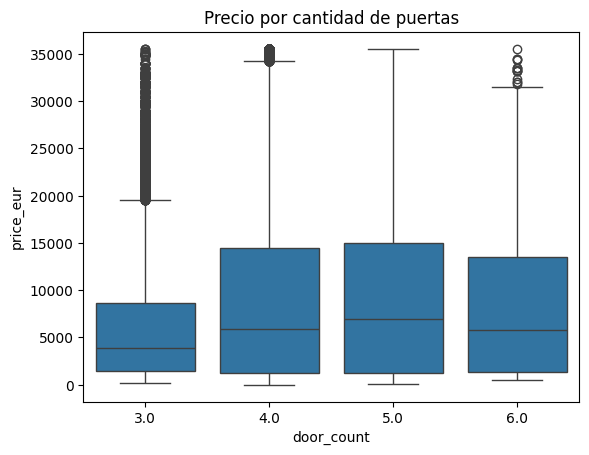

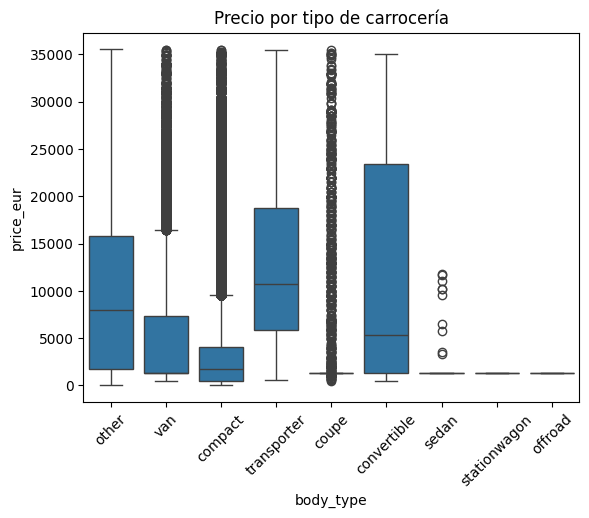

In [23]:
sns.boxplot(data=df_clean, x='transmission', y='price_eur')
plt.title('Precio por tipo de transmisión')
plt.show()

sns.boxplot(data=df_clean, x='door_count', y='price_eur')
plt.title('Precio por cantidad de puertas')
plt.show()

sns.boxplot(data=df_clean, x='body_type', y='price_eur')
plt.xticks(rotation=45)
plt.title('Precio por tipo de carrocería')
plt.show()


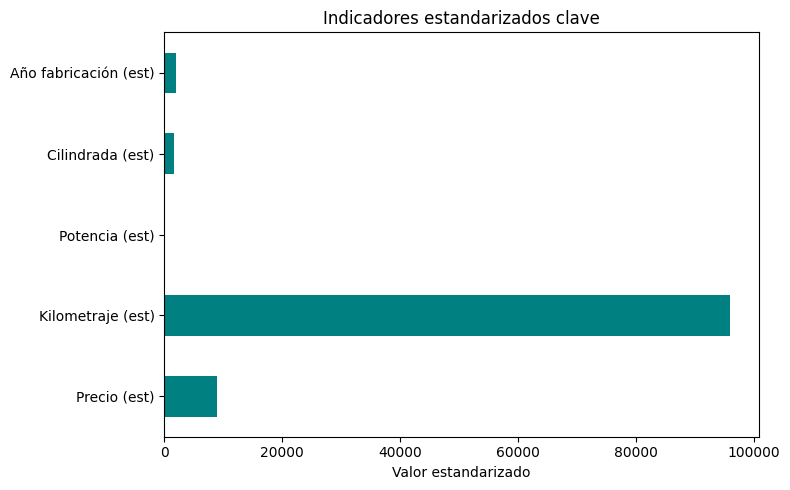

In [24]:
resumen = {
    'Precio (est)': df_clean['price_eur'].mean(),
    'Kilometraje (est)': df_clean['mileage'].mean(),
    'Potencia (est)': df_clean['engine_power'].mean(),
    'Cilindrada (est)': df_clean['engine_displacement'].mean(),
    'Año fabricación (est)': df_clean['manufacture_year'].mean()
}

import pandas as pd

resumen_df = pd.DataFrame.from_dict(resumen, orient='index', columns=['Valor Promedio'])
resumen_df.plot(kind='barh', figsize=(8,5), color='teal', legend=False)
plt.title('Indicadores estandarizados clave')
plt.xlabel('Valor estandarizado')
plt.tight_layout()
plt.show()


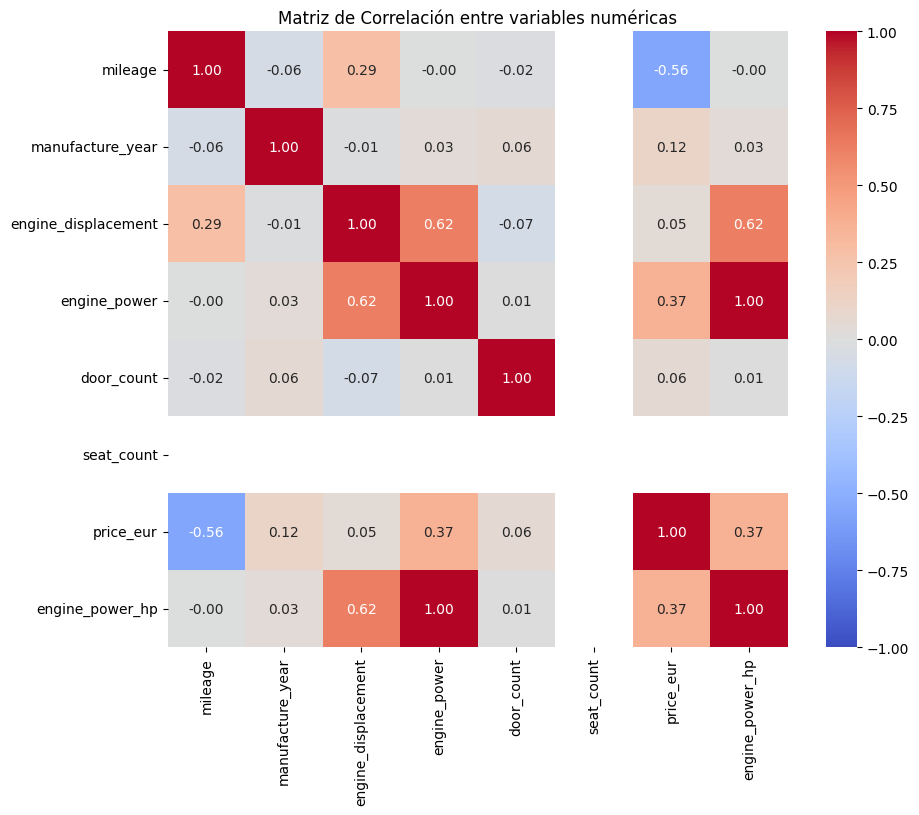

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo seleccionamos columnas numéricas
num_cols = df_clean.select_dtypes(include='float')

# Calculamos la matriz de correlación completa
corr_matrix = num_cols.corr()

# Heatmap completo
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre variables numéricas')
plt.show()


# CODIGO APARTE DE ANTES DE ESTANDARIZAR

In [ ]:
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'transmission', 'door_count', 'seat_count',
       'date_created', 'date_last_seen', 'price_eur'],
      dtype='object')

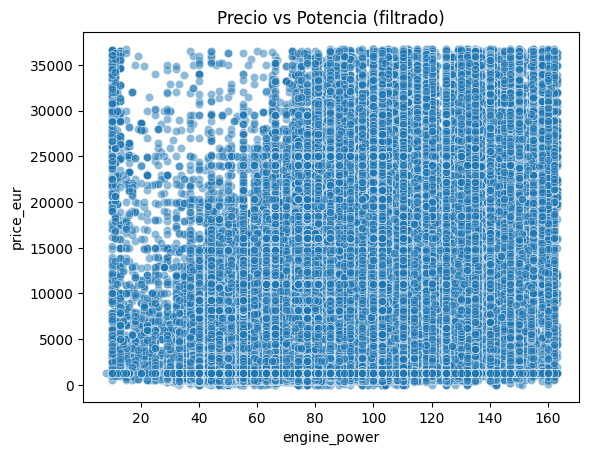

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


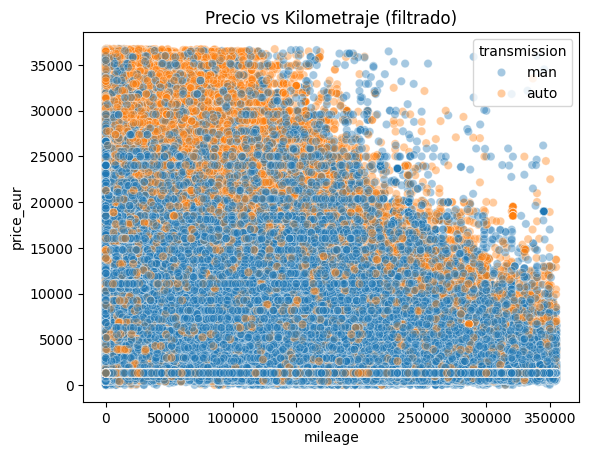

In [ ]:
sns.scatterplot(data=df_clean, x='engine_power', y='price_eur', alpha=0.5)
plt.title('Precio vs Potencia (filtrado)')
plt.show()

sns.scatterplot(data=df_clean, x='mileage', y='price_eur', hue='transmission', alpha=0.4)
plt.title('Precio vs Kilometraje (filtrado)')
plt.show()


Otras comparaciones interesantes

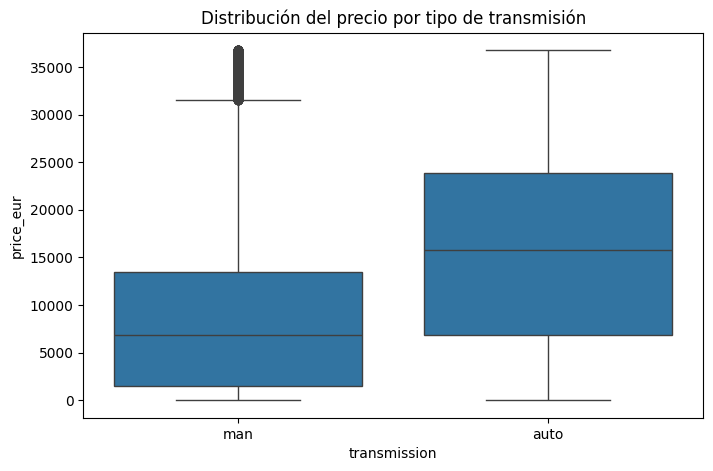

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='transmission', y='price_eur')
plt.title('Distribución del precio por tipo de transmisión')
plt.show()


Por tipo de combustible

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x='fuel_type', y='price_eur')
plt.xticks(rotation=45)
plt.title('Distribución del precio por tipo de combustible')
plt.show()


ValueError: Could not interpret value `fuel_type` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

Mini tablero visual con indicadores clave

# INGENIERIA DE VARIABLES:

In [ ]:
import datetime as dt
df['antigüedad'] = 2025 - df['manufacture_year']
df['duración_publicado'] = (df['date_last_seen'] - df['date_created']).dt.days
df['potencia_especifica'] = df['engine_power'] / df['engine_displacement']
df['uso_anual'] = df['mileage'] / df['antigüedad'].replace(0, 1)  # para evitar división por 0


import numpy as np
df['antigüedad'] = df['antigüedad'].replace(0, np.nan)
df['engine_displacement'] = df['engine_displacement'].replace(0, np.nan)

df['uso_anual'] = df['mileage'] / df['antigüedad']
df['potencia_especifica'] = df['engine_power'] / df['engine_displacement']

df = df.replace([np.inf, -np.inf], np.nan).fillna(0)